<a href="https://colab.research.google.com/github/Roberto-Teigeiro/ML-No-Framework/blob/main/Regression_NoFramework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [118]:
import kagglehub
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
handle = "yasserh/wine-quality-dataset"
path = kagglehub.dataset_download(handle)


files = os.listdir(path)

csv_file_path = os.path.join(path, files[0])
df = pd.read_csv(csv_file_path)
df=df.drop(['Id'], axis=1)# La columna Id no tiene ningun dato relevante
df.head()
X_train,X_test,y_train,y_test = train_test_split(df.drop('quality',axis=1),df['quality'],test_size=0.2,random_state=42)
y_test.head()
#check for duplicate values
X_train = X_train.drop(drop_cols,axis=1)
X_test = X_test.drop(drop_cols,axis=1)

In [119]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


/tmp/ipython-input-1107630842.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




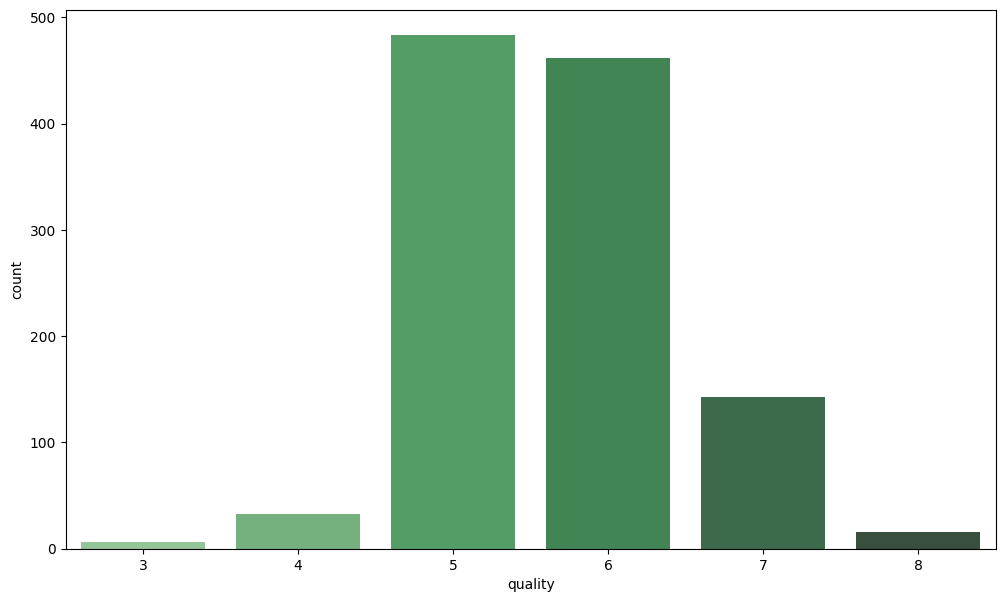

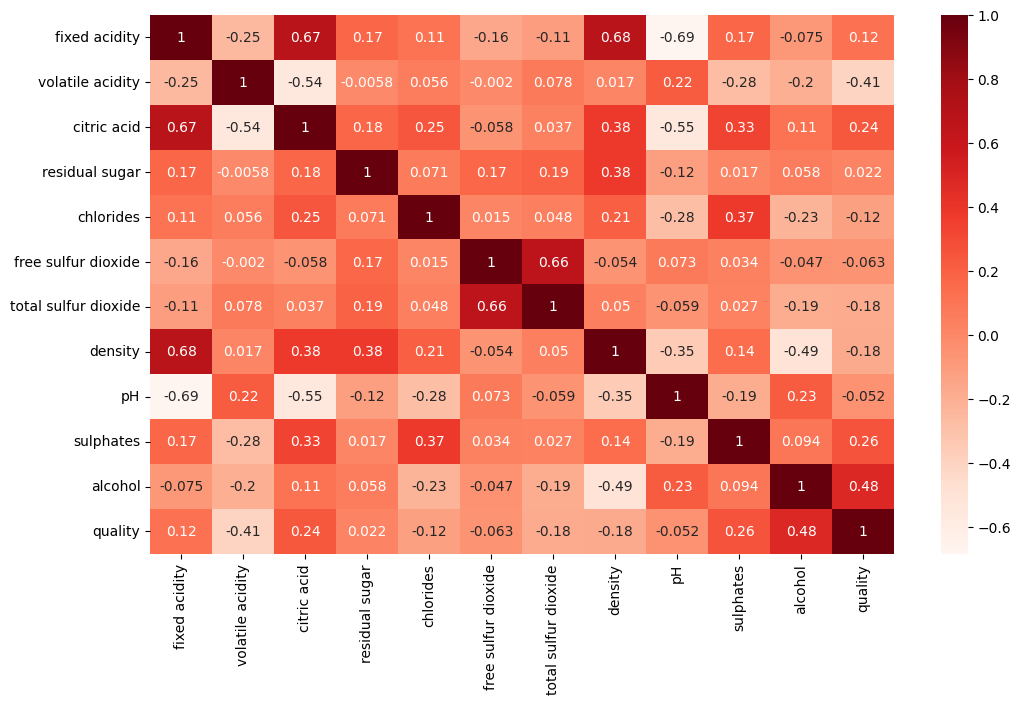

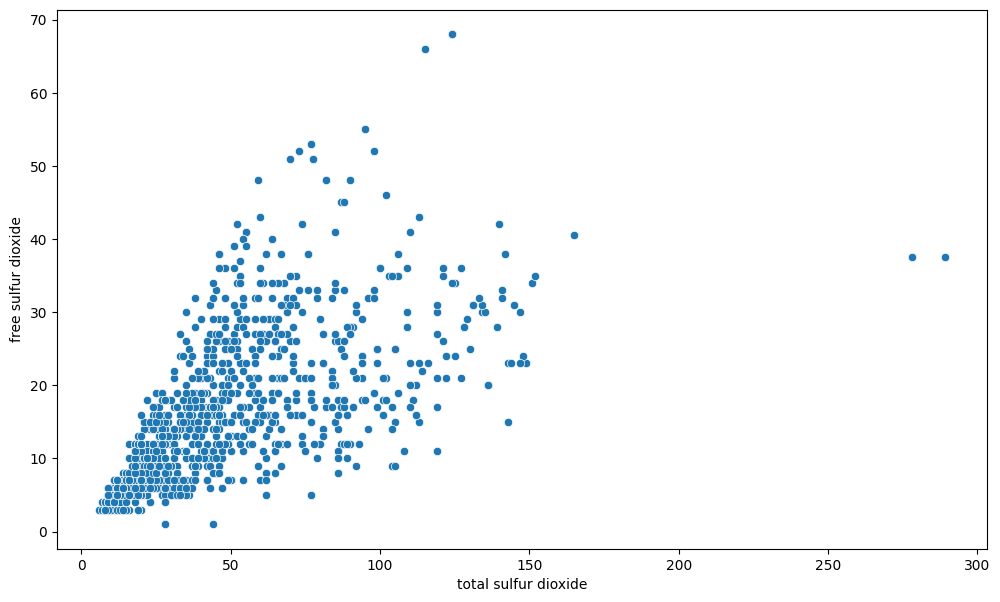

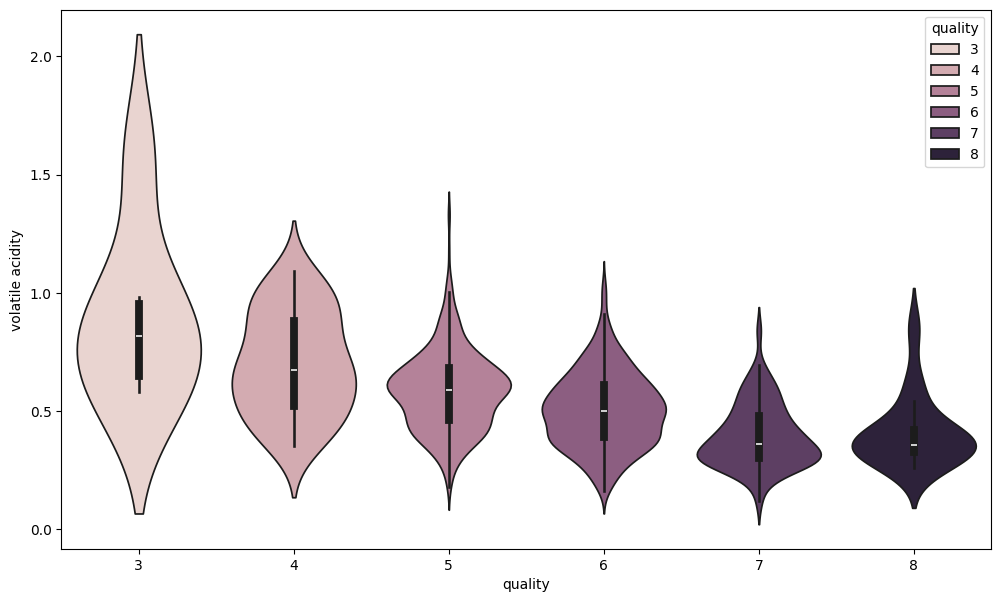

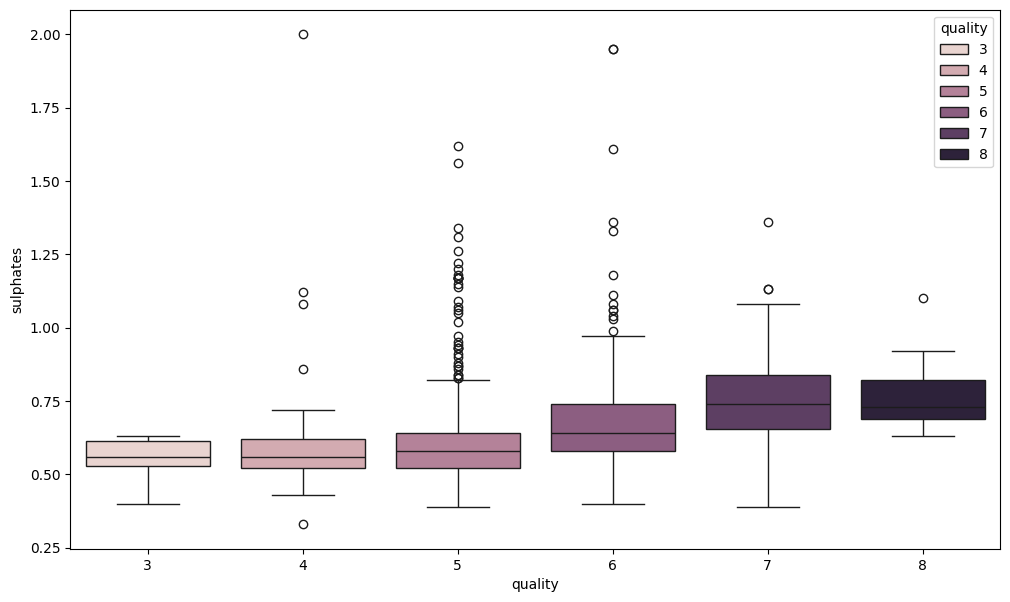

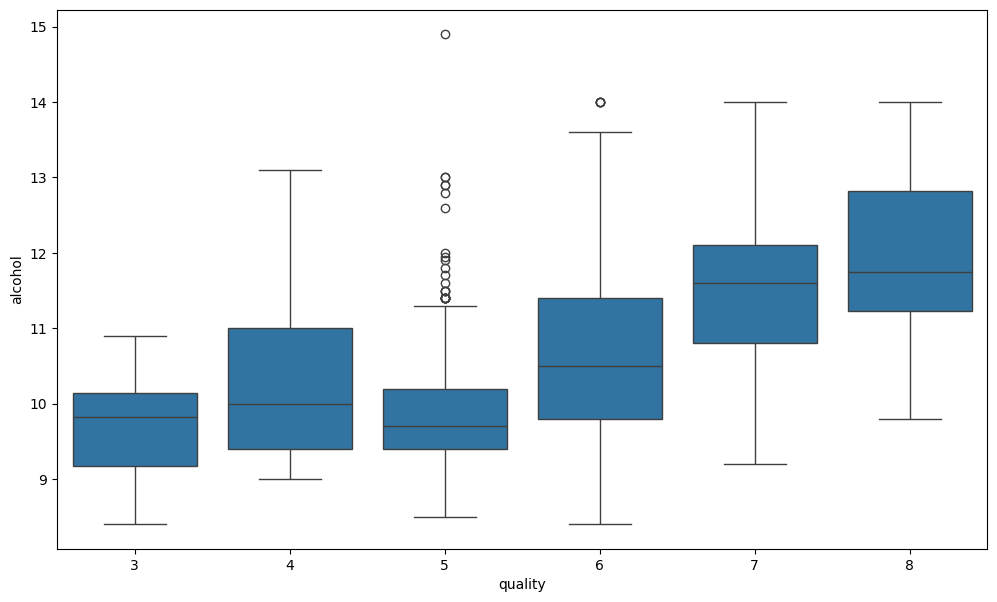

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,7))
sns.countplot(x='quality', data=df, palette='Greens_d')
plt.show()
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.show()
plt.figure(figsize=(12,7))
sns.scatterplot(x='total sulfur dioxide', y='free sulfur dioxide', data=df)
plt.show()
plt.figure(figsize=(12,7))
sns.violinplot(x='quality', y='volatile acidity', data=df, hue='quality')
plt.show()
plt.figure(figsize=(12,7))
sns.boxplot(x='quality', y='sulphates', data=df, hue='quality')
plt.show()
plt.figure(figsize=(12,7))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.show()


In [120]:
def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

In [121]:
def get_neighbors(test_point, X_train, y_train, k):
    distances = []
    for i in range(len(X_train)):
        train_point = X_train.iloc[i]
        distance = manhattan_distance(test_point, train_point)
        distances.append((distance, train_point, y_train.iloc[i]))

    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = distances[:k]
    return k_nearest_neighbors

In [122]:
def predict(neighbors):
    quality_values = [neighbor[2] for neighbor in neighbors]
    average_quality = sum(quality_values) / len(quality_values)
    return average_quality

In [136]:
class KNN:
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for i in range(len(X_test)):
            test_point = X_test.iloc[i]
            neighbors = get_neighbors(test_point, self.X_train, self.y_train, self.k)
            prediction = predict(neighbors)
            predictions.append(prediction)
        return np.array(predictions)

In [137]:

custom_knn_model = KNN(k=9)

custom_knn_model.fit(X_train, y_train)

y_pred_custom_knn = custom_knn_model.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_custom_knn = r2_score(y_test, y_pred_custom_knn)
mae_custom_knn = mean_absolute_error(y_test, y_pred_custom_knn)
mse_custom_knn = mean_squared_error(y_test, y_pred_custom_knn)
rmse_custom_knn = np.sqrt(mse_custom_knn) # Calculate RMSE from MSE

print(f"R-squared score: {r2_custom_knn}")
print(f"Mean Absolute Error: {mae_custom_knn}")
print(f"Mean Squared Error: {mse_custom_knn}")
print(f"Root Mean Squared: {rmse_custom_knn}")

R-squared score: 0.35245217117604244
Mean Absolute Error: 0.467734109655507
Mean Squared Error: 0.3603428756267184
Root Mean Squared: 0.6002856616867659
